#Tugas Praktikum 2

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:

- Jumlah cluster yang terbentuk.

- Banyaknya noise.

- Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu, dikarenakan visualisasi hanya dapat dilakukan hingga 3 dimensi).



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

HDBSCAN clustering

In [3]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
labels = clusterer.fit_predict(X)

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Hitung jumlah cluster & noise

In [4]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster terbentuk: 20
Jumlah noise: 589


Visualisasi dengan PCA

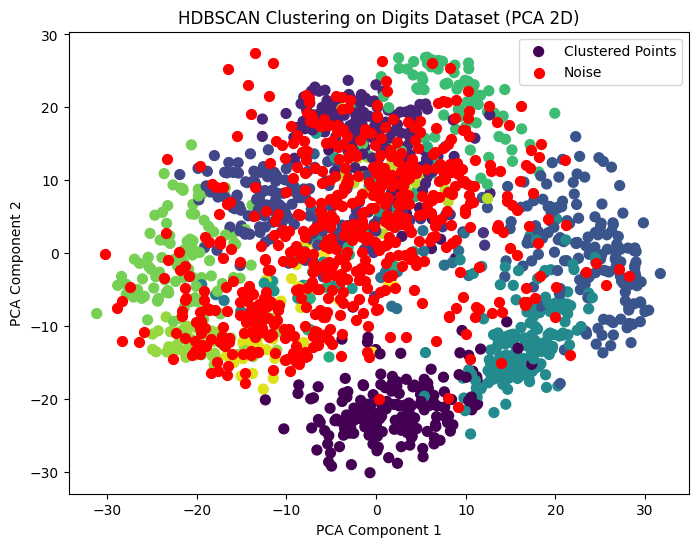

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[labels >= 0, 0], X_pca[labels >= 0, 1],
            c=labels[labels >= 0], cmap='viridis', s=50, label='Clustered Points')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1],
            c='red', s=50, label='Noise')
plt.title('HDBSCAN Clustering on Digits Dataset (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()